Задача 1
\begin{align*}
    y = x^2+6x+8-2e^{x+2}
\end{align*}
Виберемо відрізок інтерполяції [-6;0], та виберемо 4 вузли, відстань між якими буде однаковою $x_1 = -6, x_2 = -4, x_3 = -2, x_4 = 0$
Знайдемо значення функції в цих точках:

In [2]:
import math

import numpy as np
import matplotlib.pyplot as plt

def func1(x):
    """func1(x)=x^2+6x+8-2e^{x+2}"""
    return x**2 + 6*x + 8 - 2 * np.exp(x+2)

data_points = [-6, -4, -2, 0]
func1_values = [func1(x) for x in data_points]
print(func1_values)

[7.963368722222532, -0.2706705664732254, -2.0, -6.778112197861301]


Знайдемо тепер різниці всіх порядків:

In [3]:
def find_differences(func_values, lst=None):
    """Finds differences of all orders, returns a list with lists of each order's differences"""
    if len(func_values) > 1:
        func_values = func_values.copy()
        # Find all deltas(differences) of current order and store them in a list
        deltas = []
        for i in range(len(func_values) - 1):
            deltas.append(func_values[i + 1] - func_values[i])
        if lst:
            lst.append(deltas)
        else:
            lst = [deltas]
        # Recursively find differences of all higher orders
        return find_differences(deltas, lst)
    else:
        return lst
print(find_differences(func1_values))


[[-8.234039288695756, -1.7293294335267746, -4.778112197861301], [6.504709855168982, -3.0487827643345264], [-9.553492619503508]]


Знайдемо тепер поліном Лагранжа. Як ми знаємо $L_n(x) = \sum_{i=0}^{n} y_i \prod_{j=0, j \neq i}^n \frac{x-x_j}{x_i-x_j}$

In [4]:
def lagrange_polynom(x, data_points, func_values):
    """Interpolate function with func_values in data_points as lagrange polynom"""
    n = len(data_points)
    Lagrange = 0
    for i in range(n):
        prod = 1
        for j in range(n):
            if j != i:
                prod *= (x - data_points[j]) / (data_points[i] - data_points[j])
        Lagrange += func_values[i] * prod
    return Lagrange


Побудуємо графіки полінома Лагранжа та заданої функції:

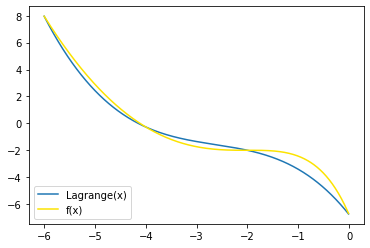

In [5]:
x = np.arange(-6, 0, 0.01)
plt.plot(x, lagrange_polynom(x, data_points, func1_values), label="Lagrange(x)")
plt.plot(x, func1(x), '#fce300' ,label="f(x)")
plt.legend(loc="lower left")
plt.show()

Побудуємо тепер перший і другий інтерполяційні поліноми Ньютона за формулами:
Перший інтерполяційний поліном Ньютона: $f(x) \approx P_n(x_0+qh) = y_0 + \sum_{i=1}^n \frac{q\cdot \dots \cdot (q-(i-1))}{i!} \Delta^iy_0$
Другий інтерполяційний поліном Ньютона: $f(x) \approx P_n(x_n+qh) = y_n + \sum_{i=1}^n \frac{q\cdot \dots \cdot (q+(i-1))}{i!} \Delta^iy_{n-i}$

In [6]:
def newton_polynom(x, data_points, func_values, form=1):
    """Interpolate function with func_values in data_points as 1st(form=1) or 2nd(form=2) Newton's polynom"""
    differences = find_differences(func_values)
    h = data_points[1] - data_points[0]
    if form == 1:
        Newton = func_values[0]
        q = (x - data_points[0]) / h
    else:
        Newton = func_values[-1]
        q = (x - data_points[-1]) / h
    coef = 1
    for i in range(len(differences)):
        coef *= (q + (-1)**form * i)/(i+1)  # q-i for first form, q+i for second form
        Newton += coef * differences[i][0] if form == 1 else coef * differences[i][-1]
    return Newton

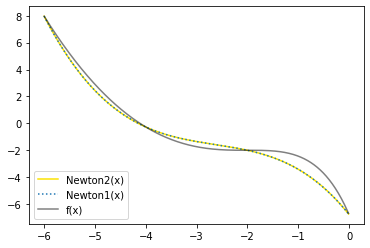

In [7]:
plt.plot(x, newton_polynom(x, data_points, func1_values,  form=2), '#fce300', label="Newton2(x)")
plt.plot(x, newton_polynom(x, data_points, func1_values, form=1), ':' ,  label="Newton1(x)")
plt.plot(x, func1(x), 'black', alpha=0.5, label="f(x)")
plt.legend(loc="lower left")
plt.show()

Знайдемо значення поліномів Лагранжа та Ньютона в невузлових точках $\tilde{x}_1 = -5, \tilde{x}_2 = -3, \tilde{x}_3 = -1, \tilde{x}_4 = -2.1$, та порівняємо із значенням заданої функції в цих точках

In [8]:
print("x=-5:", func1(-5), lagrange_polynom(-5, data_points, func1_values), newton_polynom(-5, data_points, func1_values), newton_polynom(-5, data_points, func1_values, 2))
print("x=-3:", func1(-3), lagrange_polynom(-3, data_points, func1_values), newton_polynom(-3, data_points, func1_values), newton_polynom(-3, data_points, func1_values, 2))
print("x=-1:", func1(-1), lagrange_polynom(-1, data_points, func1_values), newton_polynom(-1, data_points, func1_values), newton_polynom(-1, data_points, func1_values, 2))
print("x=-2.1",func1(-2.1), lagrange_polynom(-2.1, data_points, func1_values), newton_polynom(-2.1, data_points, func1_values), newton_polynom(-2.1, data_points, func1_values, 2))

x=-5: 2.9004258632642723 2.436167057259561 2.4361670572595613 2.4361670572595604
x=-3: -1.7357588823428847 -1.3513307264137662 -1.3513307264137664 -1.3513307264137664
x=-1: -2.43656365691809 -3.4108649646698654 -3.4108649646698637 -3.4108649646698654
x=-2.1 -1.9996748360719203 -1.920538345070339 -1.9205383450703393 -1.9205383450703395


Зобразимо ще графік побудованого сплайну:

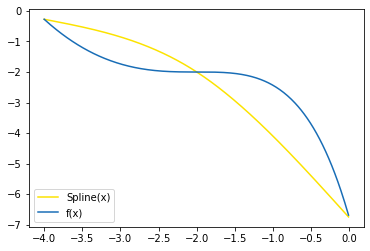

In [9]:
def spline(x):
    if x <= -2:
        return -2 - 1.62675*(x + 2) - 0.5716875*(x + 2)**2 - 0.09528125*(x + 2)**3
    else:
        return -6.778 - 2.770125*x + 0.09528125*x**3

x = np.arange(-4, 0, 0.01)
plt.plot(x, [spline(x_i) for x_i in x], '#fce300' ,  label="Spline(x)")
plt.plot(x, func1(x), '#186DB6', label="f(x)")
plt.legend(loc="lower left")
plt.show()

Побудуємо тепер всі графіки разом

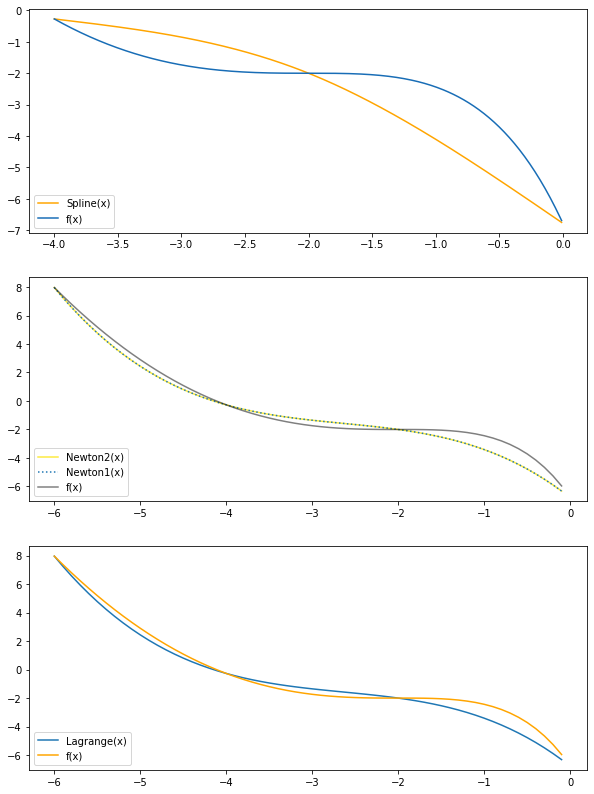

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(x, [spline(x_i) for x_i in x] , 'orange', label="Spline(x)")
ax1.plot(x, func1(x), '#186DB6', label="f(x)")
ax1.legend(loc="lower left")
x = np.arange(-6, 0, 0.1)
ax2.plot(x, newton_polynom(x, data_points, func1_values,  form=2), '#fce300', alpha=0.75 , label="Newton2(x)")
ax2.plot(x, newton_polynom(x, data_points, func1_values, form=1), ':' ,  label="Newton1(x)")
ax2.plot(x, func1(x), 'black', alpha=0.5, label="f(x)")
ax2.legend(loc="lower left")
ax3.plot(x, lagrange_polynom(x, data_points, func1_values), label="Lagrange(x)")
ax3.plot(x, func1(x), 'orange' ,label="f(x)")
ax3.legend(loc="lower left")
fig.set_size_inches(10, 14)
fig.savefig('test2png.png', dpi=500)

Задача 2

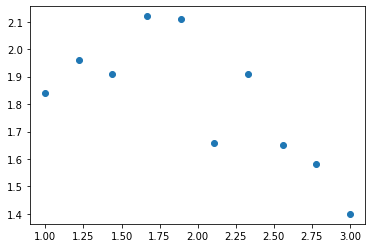

In [11]:
x_vec = [2, 2.22, 2.44, 2.67, 2.89, 3.11, 3.33, 3.56, 3.78, 4]
y_vec = [1.52, 1.84, 1.68, 1.34, 1.67, 1.35, 1.44, 1.43, 0.91, 1.09]
x_vec = [1, 1.22, 1.44, 1.67, 1.89, 2.11, 2.33, 2.56, 2.78, 3]
y_vec = [1.84, 1.96, 1.91, 2.12, 2.11, 1.66, 1.91, 1.65, 1.58, 1.4]
plt.scatter(x_vec, y_vec)
plt.savefig('scatter.png', dpi=300)
plt.show()

Бачимо що розташування точок нагадує параболу вітками вниз. Тому як апроксимуючу фукнцію виберемо $y = c + bx + ax^2$
Позначимо
$$
\vec{c} = \begin{pmatrix}
c \\ b \\ a
\end{pmatrix},
F = \begin{pmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
& \dots & \\
1 & x_n & x_n^2
\end{pmatrix}
$$
Тоді з курсу математичної статистики відомо, що МНК дасть таке значення вектору $\vec{c}$:
$$
\vec{c} = (F^\top F)^{-1} F^\top \vec{y}
$$
Знайдемо це значення:

[ 1.1432184   1.04776468 -0.32317465]


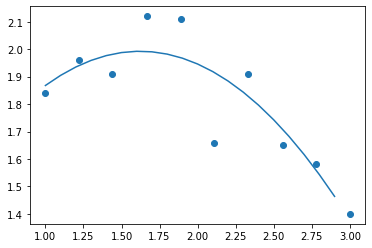

In [13]:
F_t = np.array([
    [1 for i in range(len(x_vec))],
    x_vec,
    [x**2 for x in x_vec]
])
F = np.transpose(F_t)
c_vec = np.linalg.inv(F_t @ F) @ F_t @ y_vec
print(c_vec)

def MNK(x, c_vec):
    """Returns f(x) = c + bx + ax^2"""
    return c_vec[0] + x*c_vec[1] + x**2*c_vec[2]

x = np.arange(1, 3, 0.1)
plt.plot(x, MNK(x, c_vec))
plt.scatter(x_vec, y_vec)
plt.savefig('plot2.png', dpi=400)